Obvservable Trends
    - Rides are fewer and more expensive in rural areas, and more frequent and cheaper as you get more urban
    - Although rural rides are more expensive, they are much less frequent and therefore still make up only %6.8 of total fares
    - Urban drivers make up %80.9 of all drivers, while rural drivers make up only %2.6

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

#drop duplicates
city_data = city_data.drop_duplicates("city", keep = "first")

# Combine the data into a single dataset
pyber_data = city_data.merge(ride_data, on = "city", how = "outer")
# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#Create separate data frames based on city types (Ubran, Suburban, and Rural)
urban_city = pyber_data.loc[(pyber_data["type"] == "Urban")]
suburban_city = pyber_data.loc[(pyber_data["type"] == "Suburban")]
rural_city = pyber_data.loc[(pyber_data["type"] == "Rural")]

# Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

#Per city calculations for Suburban cities
avg_fare_suburban_city = suburban_city.groupby(["city"])["fare"].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

#Per city calculations for Rural cities
avg_fare_rural_city = rural_city.groupby(["city"])["fare"].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

## Bubble Plot of Ride Sharing Data

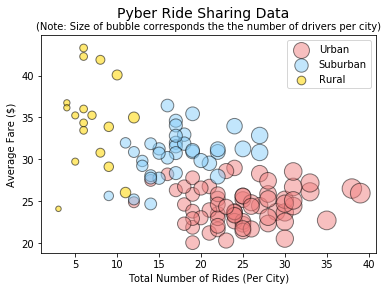

In [3]:
# Build the scatter plots for each city types
plt.scatter(total_rides_urban_city, avg_fare_urban_city, s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city, s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city, s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

# Incorporate the other graph properties
plt.suptitle("Pyber Ride Sharing Data", fontsize=14)
plt.title("(Note: Size of bubble corresponds the the number of drivers per city)", fontsize=10)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc="upper right")

# Save Figure
plt.savefig("Pyber Ride Sharing.png")
plt.show()

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

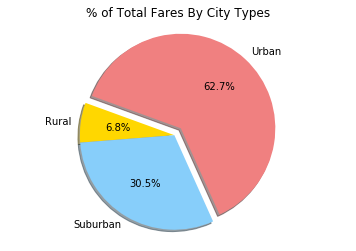

In [5]:
# Calculate Type Percents
total_fare = pyber_data.groupby(["type"])["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0 , 0.1]
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Fares By City Types.png")


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

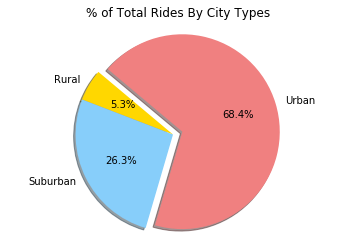

In [7]:
# Calculate Ride Percents
total_rides = pyber_data.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


# Save Figure
plt.savefig("% of Total Rides By City Types.png")
plt.show()

## Total Drivers by City Type

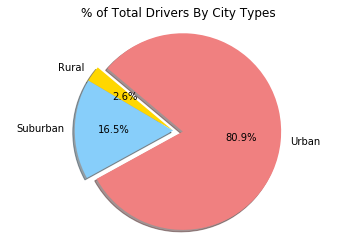

In [8]:
# Calculate Driver Percents
total_drivers = city_data.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save figure
plt.savefig("% of Total Drivers By City Types.png")



